# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: K-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

### GROUP 5

#### First Student Name and ID: Kavish Khatri(1002069464)
#### Second Student Name and ID: Mounika Kanneti(1002032500)
#### Third Student Name and ID: Vijitha Kotapati(1001860730)


## Task1: K-means

Run this cell to read and display top 5 rows of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")

country_data = pd.read_csv("Country-data.csv")
print("Shape of the data:",country_data.shape)
country_data.head()

Shape of the data: (167, 10)


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [2]:
# Checking if there are any missing values found in the data
missing_vals = country_data.isnull().sum()

# Handling missing values
missing_vals = country_data.isnull().sum()

if missing_vals.any():
    print("Missing values found!")
    country_data.fillna(country_data.mean(), inplace=True)
    print('Missing values filled with mean.')
else:
    print('No missing values found!\n')
print(missing_vals) 

No missing values found!

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


##### In this case there are no missing values found. If there are any missing values, we can choose to fill them using appropriate methods such as filling them with mean, median, mode, or even dropping rows.

##### Filling missing values with mean is a common and most suitable method for numerical data when missing values are only few. However we should only the missing values if there might be an impact on the rest of the data or the analysis we will be doing. 

### Part 1B: 10 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

##### We can identify columns that are not relevant for clustering and drop them using the drop() function.

In [3]:
#Dropping unnecessary columns that are not used for clustering
cols_to_drop = ['country']
clustered_country_data = country_data.drop(columns = cols_to_drop)
print("Country data after dropping irrelevant columns:",clustered_country_data.shape)
clustered_country_data.head()

Country data after dropping irrelevant columns: (167, 9)


child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

##### Using preprocessing techniques like StandardScaler to scale the data can result in consistent processing.

In [4]:
# Keep only the numeric columns for scaling and clustering
numeric_columns_in_country_data = clustered_country_data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_numeric_country_data = scaler.fit_transform(numeric_columns_in_country_data)
scaled_numeric_country_data_df = pd.DataFrame(data=scaled_numeric_country_data, columns=numeric_columns_in_country_data.columns)

In [5]:
# Display the processed data
scaled_numeric_country_data_df.shape
scaled_numeric_country_data_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

##### Dropping unnecessary columns helps reduce noise and focuses on relevant features. 

##### Scaling is crucial to ensure that all features contribute equally to the clustering process.

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

In [6]:
#Performing the elbow method to determine the optimal number of clusters for k-means
SSE = []
#sequence of numbers starting from 2 and ending at 12, so we use the range from 2 to 13 to inlclude 12th.
for k in range(2, 13): 
    clusters_k_means = KMeans(n_clusters=k, random_state=42)
    clusters_k_means.fit(scaled_numeric_country_data)
    SSE.append(clusters_k_means.inertia_)

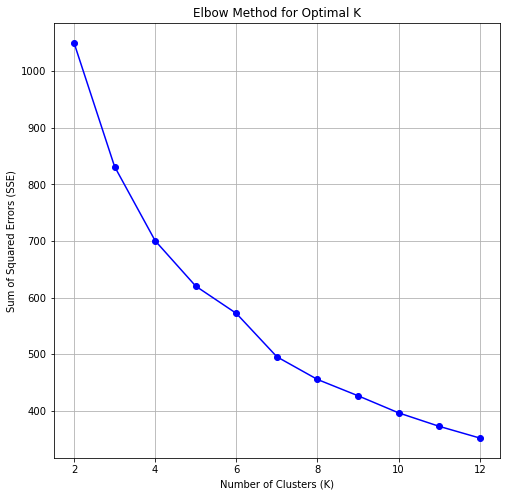

Sum of Squared Errors (SSE) values are:



[1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 620.1633712888423,
 571.9992966496743,
 495.3233825951919,
 455.2768276046999,
 426.45844564714736,
 396.25069895342995,
 372.4522597657661,
 351.80672738520536]

In [7]:
# Plot SSE for different values of k
plt.figure(figsize=(8, 8))
plt.plot(range(2, 13), SSE, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()
print('Sum of Squared Errors (SSE) values are:\n')
SSE

In [8]:
# Determine the best k value
diff_SSE = np.diff(SSE)
elbow_point_SSE = np.argmax(diff_SSE) +1
best_k_elbow = elbow_point_SSE + 2  

print("Best K value using Elbow Method:", best_k_elbow)

#Reference: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
#Reference: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

Best K value using Elbow Method: 12


### Interpret the results

##### The point where the SSE starts to decline more slowly is known as the "elbow point" on the SSE plot. This point represents the relationship between decreased within-cluster variation and avoiding overfitting, making it typically the ideal number of clusters.
##### To determine the best k value, we calculate the differences between consecutive SSE values using the np.diff() function and find the index of the maximum difference using np.argmax(). 
##### Finally, we add 2 to the index to get the actual best k value. This is because we started the loop with k values from 2. Adding 2 gives the index with the correct k value.

### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

In [9]:
# Part 1D: Silhouette Score for Optimal K
silhouette_scores = []
for k in range(2, 13):
    clusters_k_means = KMeans(n_clusters=k, random_state=42)
    clusters_k_means.fit(scaled_numeric_country_data_df)
    silhouette_avg = silhouette_score(scaled_numeric_country_data_df, clusters_k_means.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Find the index with the maximum silhouette score
silhoutte_index = np.argmax(silhouette_scores)
best_k_silhoutte = silhoutte_index + 2  

Silhouette Score for 2 clusters: 0.28735668921406704
Silhouette Score for 3 clusters: 0.28329575683463126
Silhouette Score for 4 clusters: 0.301375962376881
Silhouette Score for 5 clusters: 0.2992594995920442
Silhouette Score for 6 clusters: 0.23506989275162896
Silhouette Score for 7 clusters: 0.24905003461730515
Silhouette Score for 8 clusters: 0.2414024552159115
Silhouette Score for 9 clusters: 0.2034069293261364
Silhouette Score for 10 clusters: 0.21931388763003506
Silhouette Score for 11 clusters: 0.1979613096161359
Silhouette Score for 12 clusters: 0.20602646495525875


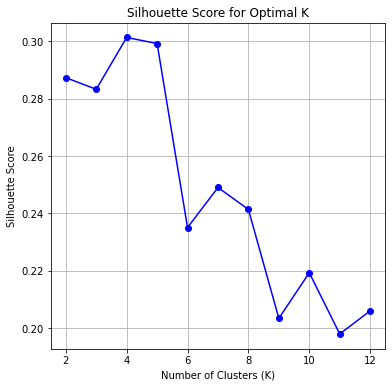

In [10]:
# Plot Silhouette Score for different values of k
plt.figure(figsize=(6, 6))
plt.plot(range(2, 13), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [11]:
#Determining the best k value
print("Best K value using Silhouette Score:", best_k_silhoutte)

Best K value using Silhouette Score: 4


### Interpret the results

##### The Silhouette Score ranges from -1 to 1, where higher values indicate well-defined clusters.
##### For each K value of range from 2 to 12, the KMeans algorithm is applied to the scaled data. The silhouette score is calculated for each data point, comparing its similarity of a respective cluster compared to other clusters. The average silhouette score for all data points is then calculated for each K value.
##### The K value that generates the highest average silhouette score is considered as the potential optimal number of clusters.

### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [12]:
# Compare the two best values
if best_k_elbow <= best_k_silhoutte:
    best_k_value = best_k_elbow
    method_used = "Elbow Method"
else:
    best_k_value = best_k_silhoutte
    method_used = "Silhoutte Analysis"

print(f"The best k value is {best_k_value} based on {method_used}.")

final_k_means = KMeans(n_clusters=best_k_value, random_state=42)
final_k_means.fit(scaled_numeric_country_data_df)

#Reference: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

The best k value is 4 based on Silhoutte Analysis.


KMeans(n_clusters=4, random_state=42)

In [13]:
scaled_numeric_country_data_df['cluster_labels'] = (final_k_means.labels_)

In [14]:
scaled_numeric_country_data_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster_labels  
0   1.902882 -0.679180               1  
1  -0.859973 -0.485623               0  
2  -0.038404 -0.465376               0  
3   2.128151 -0.516268               1  
4  -0.541946 -0.041817               0

### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [15]:
cluster_means = scaled_numeric_country_data_df.groupby('cluster_labels').mean()

In [16]:
cluster_means

child_mort   exports    health   imports    income  inflation  \
cluster_labels                                                                  
0                -0.419827  0.006648 -0.211724  0.047581 -0.217274  -0.034953   
1                 1.360218 -0.437533 -0.155984 -0.189204 -0.686894   0.402111   
2                -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189   
3                -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   

                life_expec  total_fer      gdpp  
cluster_labels                                   
0                 0.268420  -0.438222 -0.330805  
1                -1.282180   1.364944 -0.604242  
2                 1.107649  -0.763681  1.661902  
3                 1.226824  -1.038863  2.440797

# Interpret your results

#### Child Mortality (child_mort):

Cluster 0: Low child mortality rates.
Cluster 1: High child mortality rates.
Cluster 2: Moderate child mortality rates.
Cluster 3: Very high child mortality rates.

#### Exports:

Cluster 0: Slightly higher than average exports.
Cluster 1: Very low exports.
Cluster 2: Above-average exports.
Cluster 3: Extremely high exports.

#### Health:

Cluster 0: Below-average health expenditure.
Cluster 1: Below-average health expenditure.
Cluster 2: Above-average health expenditure.
Cluster 3: Near-average health expenditure.

#### Imports:

Cluster 0: Slightly above-average imports.
Cluster 1: Below-average imports.
Cluster 2: Below-average imports.
Cluster 3: Extremely high imports.

#### Income:

Cluster 0: Below-average income.
Cluster 1: Very low income.
Cluster 2: Above-average income.
Cluster 3: Extremely high income.

#### Inflation:

Cluster 0: Low inflation.
Cluster 1: High inflation.
Cluster 2: Low inflation.
Cluster 3: Low inflation.

#### Life Expectancy (life_expec):

Cluster 0: Above-average life expectancy.
Cluster 1: Below-average life expectancy.
Cluster 2: Above-average life expectancy.
Cluster 3: Below-average life expectancy.

#### Total Fertility (total_fer):

Cluster 0: Below-average fertility.
Cluster 1: Above-average fertility.
Cluster 2: Below-average fertility.
Cluster 3: Above-average fertility.

#### GDP per Capita (gdpp):

Cluster 0: Below-average GDP per capita.
Cluster 1: Very low GDP per capita.
Cluster 2: Above-average GDP per capita.
Cluster 3: Extremely high GDP per capita.

### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

In [17]:
# Get the cluster assignments for each data point
scaled_numeric_country_data_df['cluster_labels'] = final_k_means.labels_

# Retrieve the 'country' column from the original data
scaled_numeric_country_data_df['country'] = country_data['country']

# Create a dictionary to store the countries for each cluster
top_countries_by_cluster = {}

# Iterate through each cluster
for cluster_label in range(best_k_value):
    
    # Filter data for the current cluster
    cluster_data = scaled_numeric_country_data_df[scaled_numeric_country_data_df['cluster_labels'] == cluster_label]
    
    # Sort the cluster data by a chosen feature (e.g. GDP per capita)
    sorted_cluster_data = cluster_data.sort_values(by='gdpp', ascending=False)
    
    # Get the top 5 countries in the current cluster
    top_countries = sorted_cluster_data.head(5)['country']
    
    # Store the top countries in the dictionary
    top_countries_by_cluster[cluster_label] = top_countries
    

# Print the countries for each cluster
for cluster_label, countries in top_countries_by_cluster.items():
    print(f"\nCluster {cluster_label + 1} - Top 5 countries:")
    for rank, country in enumerate(countries, start=1):
        print(f"{rank}. {country}")


Cluster 1 - Top 5 countries:
1. Bahamas
2. Bahrain
3. Czech Republic
4. Oman
5. Saudi Arabia

Cluster 2 - Top 5 countries:
1. Equatorial Guinea
2. Gabon
3. South Africa
4. Botswana
5. Namibia

Cluster 3 - Top 5 countries:
1. Norway
2. Switzerland
3. Qatar
4. Denmark
5. Sweden

Cluster 4 - Top 5 countries:
1. Luxembourg
2. Singapore
3. Malta


### Part 1H: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

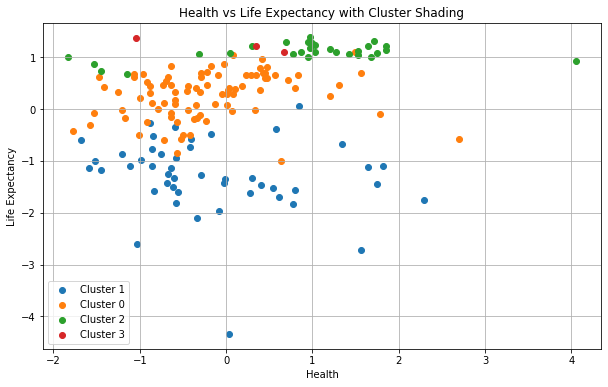

In [18]:
plt.figure(figsize=(10, 6))

for cluster_label in scaled_numeric_country_data_df['cluster_labels'].unique():
    cluster_data = scaled_numeric_country_data_df[scaled_numeric_country_data_df['cluster_labels'] == cluster_label]
    plt.scatter(cluster_data['health'], cluster_data['life_expec'], label=f'Cluster {cluster_label}')

plt.xlabel('Health')
plt.ylabel('Life Expectancy')
plt.title('Health vs Life Expectancy with Cluster Shading')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#Referene: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
data = pd.read_csv('co-ordinates.csv')
data.head()

X         Y
0 -10.288860 -3.480595
1 -11.025979 -4.267757
2  -9.242627 -3.115357
3   9.572838 -0.395079
4  -6.625216 -8.221243

### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

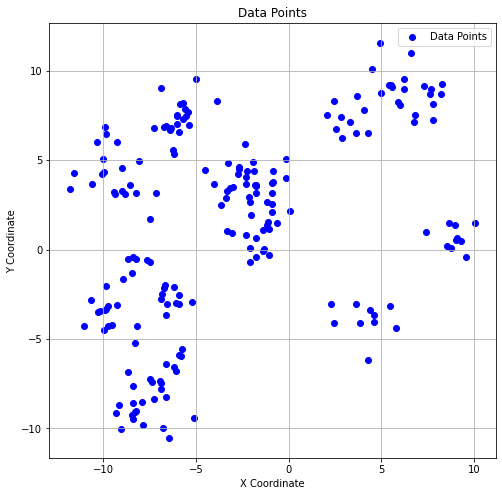

In [21]:
# Extract X and Y columns
x_extracted_data = data["X"].values
y_extracted_data = data["Y"].values

# Combine into a single array
coordinate_array = np.column_stack((x_extracted_data, y_extracted_data))

# Plot the data points
plt.figure(figsize=(8,8))

# Scatter plot the extracted data points
plt.scatter(x_extracted_data, y_extracted_data, c='blue' , label='Data Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Data Points')

plt.legend()
plt.grid(True)
plt.show()

# Reference: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ 

#### Guess the possible clusters. Explain your guess

As per the guess there are 7 clusters. We can see there is 4 clusters clearly we can see. there is another cluster in the region where X<0 and Y>0 also X<0 and Y<0 

Below mentioned are the 7 clusters:
#### Cluster1-> X coordinate:   -10 -5            Y coordinate:  -10 -5
#### Cluster2-> X coordinate:   -10 -5            Y coordinate:   -5  0 
#### Cluster3-> X coordinate:   -10 -5            Y coordinate:    0 10
#### Cluster4-> X coordinate:    -5  0            Y coordinate:    0  5
#### Cluster5-> X coordinate:     0  5            Y coordinate:   -5  0
#### Cluster6-> X coordinate:     6  10           Y coordinate:    0  5
#### Cluster7-> X coordinate:     0  10           Y coordinate:    5  10

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

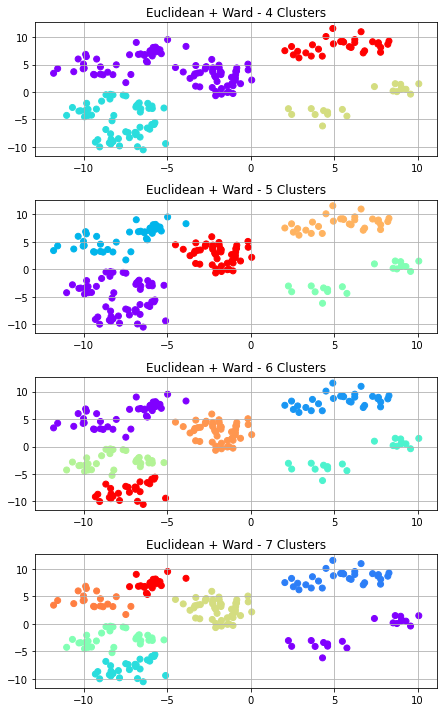

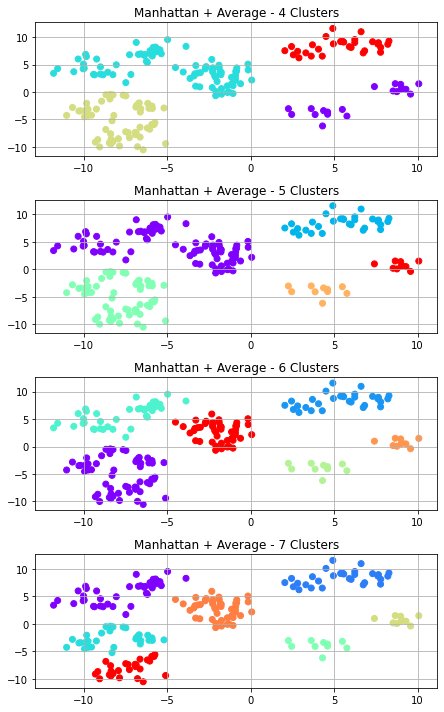

In [22]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

cluster_numbers = [4, 5, 6, 7]

# Define affinity and linkage methods
plots = ['euclidean', 'manhattan']
linkages = {'euclidean': 'ward', 'manhattan': 'average'}

# Using 'for' loop for affinity and linkage combinations
for affinity in plots:
    plt.figure(figsize=(12, 10))
    for clusters_num in cluster_numbers:
        # Create AgglomerativeClustering instance
        linkage_method = linkages[affinity]
        cluster_data = AgglomerativeClustering(n_clusters=clusters_num, affinity=affinity, linkage=linkage_method)
            
        # Fit and predict cluster labels
        cluster_labeling = cluster_data.fit_predict(coordinate_array)
            
        # Create subplot for each cluster number
        plt.subplot(len(cluster_numbers), len(plots), cluster_numbers.index(clusters_num) * len(plots) + 1 + plots.index(affinity))

        # Scatter plot the extracted data points
        plt.scatter(x_extracted_data, y_extracted_data, c=cluster_labeling, cmap='rainbow')
        plt.title(f'{affinity.capitalize()} + {linkage_method.capitalize()} - {clusters_num} Clusters')
        plt.grid(True)
            
    plt.tight_layout()
    plt.show()
    
#REFERENCES
# https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

### Interpret your results. Explain your selection.

#### Optimal clusters are obtained with K=7 using Manhattan distance and average linkage.
#### Manhattan distance measures separation on a grid-like system, summing absolute coordinate differences.
#### Euclidean distance is less robust against outliers compared to Manhattan distance.
#### Average linkage merges clusters by averaging distances between all point pairs in different clusters.
#### Average linkage is robust against outliers and often produces elongated, linear clusters.
#### This linkage method is effective for datasets with linear shapes and well-suited for Manhattan distance.

### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

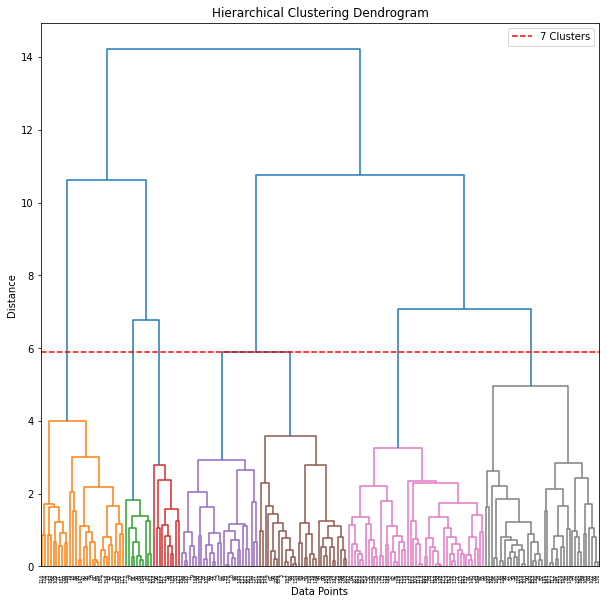

In [23]:
# Define the number of clusters (K)
clusters_num = 7  

# Hierarchical clustering using Euclidean Ward linkage

ward_eluc = linkage(coordinate_array, method='average')

clusters = fcluster(ward_eluc, clusters_num, criterion='maxclust')

# Create a dendrogram
plt.figure(figsize=(10,10))

# Plot the dendrogram using Euclidean Ward linkage results
dendrogram(ward_eluc, labels=np.arange(1, len(coordinate_array) + 1), color_threshold=ward_eluc[-clusters_num + 1, 2])

# Add a horizontal line at the threshold distance to mark the chosen number of clusters
plt.axhline(y=ward_eluc[-clusters_num + 1, 2], color='r', linestyle='--', label=f'{clusters_num} Clusters')

# Add labels to x and y axes
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.legend()
plt.show()

#Reference: # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.